In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez(RNA) bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez(RNA).csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.0,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-15.4,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-13.7,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-16.0,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8,0
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6,0
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2,0
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7,0
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-14.106340
1,-79,-14.098998
2,-78,-14.116450
3,-77,-14.110805
4,-76,-14.116518
...,...,...
94,14,-14.079003
95,15,-14.092713
96,16,-14.099611
97,17,-14.063958


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-14.092467,150
1,-79,-14.107778,151
2,-78,-14.095460,152
3,-77,-14.101847,153
4,-76,-14.121801,154
...,...,...,...
94,14,-14.122721,244
95,15,-14.112053,245
96,16,-14.112550,246
97,17,-14.142695,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


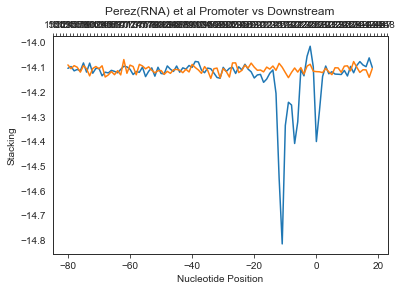

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Perez(RNA) et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
29334,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
29335,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
29336,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.6806407634628494, Precision: 0.6706192358366272, Recall: 0.6996563573883161, F1 Score: 0.6848301379078372, MCC: 0.36179669749172616, Specificity: 0.6619337390128465
Fold 2: Accuracy: 0.7075664621676891, Precision: 0.6899022801302932, Recall: 0.7349063150589868, F1 Score: 0.7116935483870968, MCC: 0.41646744918229067, Specificity: 0.681178834561286
Fold 3: Accuracy: 0.7051806407634629, Precision: 0.7053805774278216, Recall: 0.7209926224010731, F1 Score: 0.713101160862355, MCC: 0.4100901346185502, Specificity: 0.6888426888426888
Fold 4: Accuracy: 0.6935923653715065, Precision: 0.6858064516129032, Recall: 0.7206779661016949, F1 Score: 0.7028099173553718, MCC: 0.38750265583193244, Specificity: 0.6662097326936258
Fold 5: Accuracy: 0.6952965235173824, Precision: 0.6810012836970475, Recall: 0.7277091906721537, F1 Score: 0.7035809018567639, MCC: 0.3917353689752709, Specificity: 0.6632791327913279
Fold 6: Accuracy: 0.7038173142467621, Precision: 0.6953947368421053, Recall: 0.

In [30]:
accuracy_list

[0.6806407634628494,
 0.7075664621676891,
 0.7051806407634629,
 0.6935923653715065,
 0.6952965235173824,
 0.7038173142467621,
 0.7051806407634629,
 0.6949556918882073,
 0.7016706443914081,
 0.6951926355267644]

In [31]:
precision_list

[0.6706192358366272,
 0.6899022801302932,
 0.7053805774278216,
 0.6858064516129032,
 0.6810012836970475,
 0.6953947368421053,
 0.6956521739130435,
 0.6821705426356589,
 0.7008547008547008,
 0.6957377049180328]

In [32]:
recall_list

[0.6996563573883161,
 0.7349063150589868,
 0.7209926224010731,
 0.7206779661016949,
 0.7277091906721537,
 0.722488038277512,
 0.7172413793103448,
 0.7237834132967786,
 0.7173620457604307,
 0.7116029510395707]

In [33]:
specificity_list

[0.6619337390128465,
 0.681178834561286,
 0.6888426888426888,
 0.6662097326936258,
 0.6632791327913279,
 0.6852481305234535,
 0.6933962264150944,
 0.6664406779661017,
 0.6855563234277816,
 0.6782246879334258]

In [34]:
f1_score_list 

[0.6848301379078372,
 0.7116935483870968,
 0.713101160862355,
 0.7028099173553718,
 0.7035809018567639,
 0.7086825343613812,
 0.7062818336162988,
 0.7023611572996343,
 0.7090123046225473,
 0.7035809018567639]

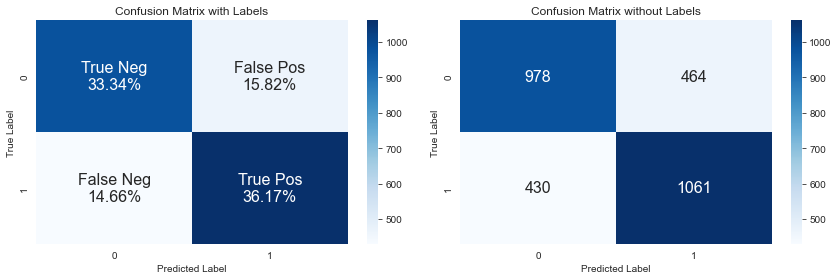

In [35]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [36]:
print(mean(accuracy_list))

0.6983093682099495


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


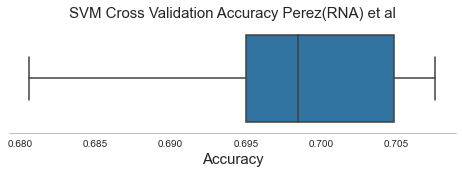

In [37]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Perez(RNA) et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [38]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.6951926355267644
Precision: 0.6957377049180328
Recall: 0.7116029510395707
f1_score: 0.7035809018567639


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


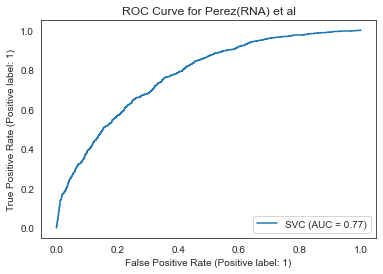

In [39]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Perez(RNA) et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


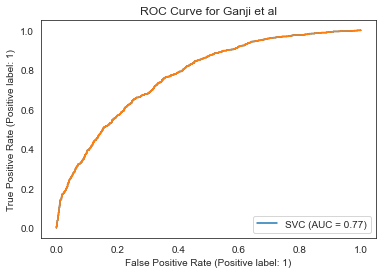

In [40]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_perez_RNA_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

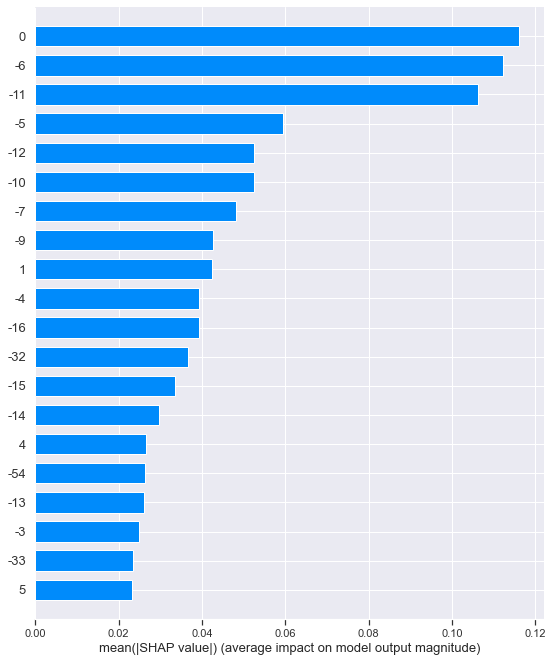

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

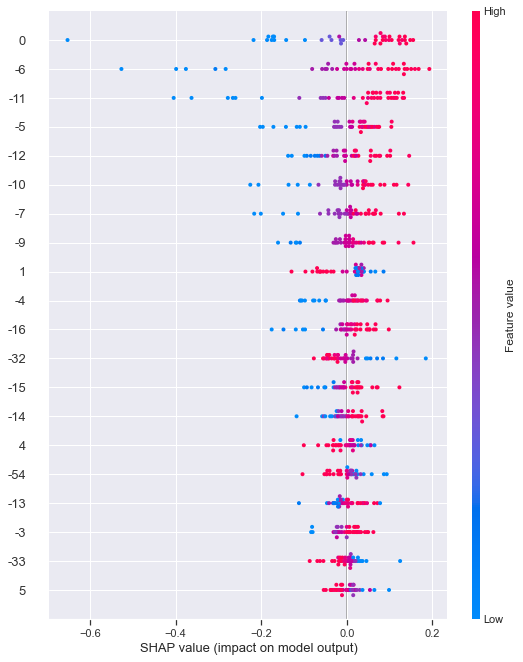

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

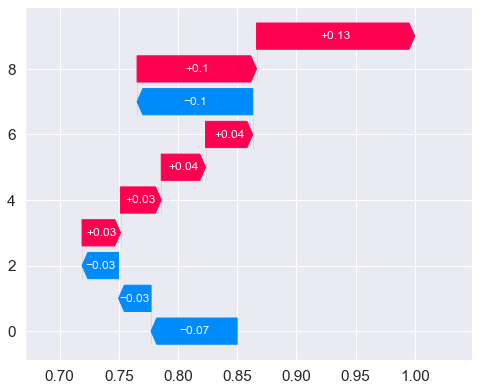

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [41]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [42]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Perez Test Organism')]

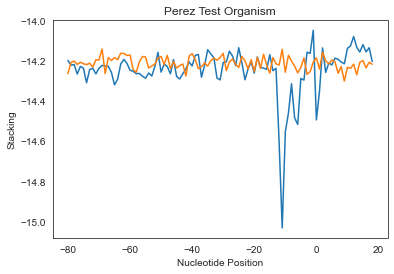

In [43]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Perez Test Organism')

## Test Labels

In [44]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [45]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [46]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7461038961038962


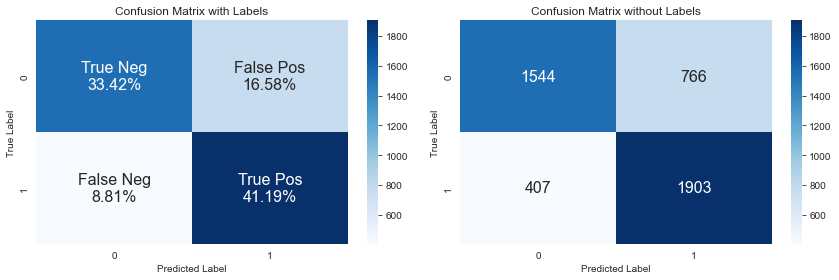

In [47]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [49]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.7510822510822511, Precision: 0.7230769230769231, Recall: 0.8138528138528138, F1 Score: 0.7657841140529531, MCC: 0.5061691013657947, Specificity: 0.6883116883116883
Fold 2/10
 Accuracy: 0.7424242424242424, Precision: 0.7105263157894737, Recall: 0.8181818181818182, F1 Score: 0.7605633802816901, MCC: 0.49051147158797265, Specificity: 0.6666666666666666
Fold 3/10
 Accuracy: 0.7294372294372294, Precision: 0.6962962962962963, Recall: 0.8138528138528138, F1 Score: 0.750499001996008, MCC: 0.4655575444136781, Specificity: 0.645021645021645
Fold 4/10
 Accuracy: 0.7445887445887446, Precision: 0.7164750957854407, Recall: 0.8095238095238095, F1 Score: 0.7601626016260162, MCC: 0.4933557123849219, Specificity: 0.6796536796536796
Fold 5/10
 Accuracy: 0.7554112554112554, Precision: 0.7137681159420289, Recall: 0.8528138528138528, F1 Score: 0.777120315581854, MCC: 0.5208000223101698, Specificity: 0.658008658008658
Fold 6/10
 Accuracy: 0.7445887445887446, Precision: 0.71320754716981

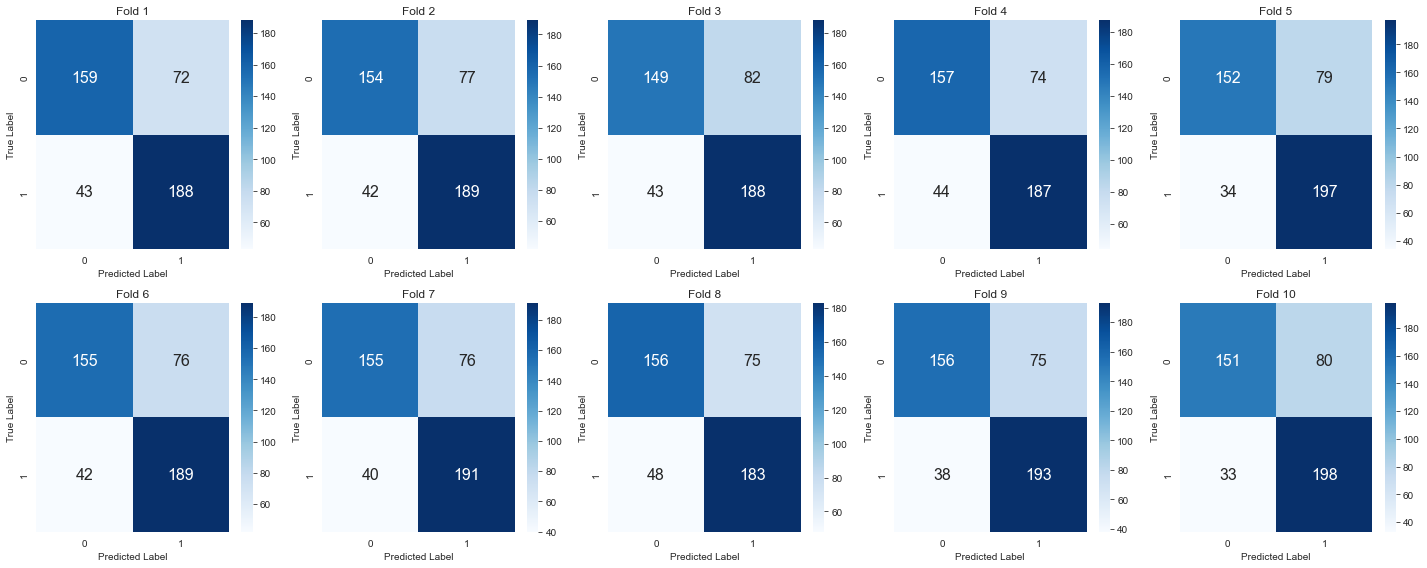

In [50]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [51]:
test_accuracy

[0.7510822510822511,
 0.7424242424242424,
 0.7294372294372294,
 0.7445887445887446,
 0.7554112554112554,
 0.7445887445887446,
 0.7489177489177489,
 0.7337662337662337,
 0.7554112554112554,
 0.7554112554112554]

In [52]:
test_precision

[0.7230769230769231,
 0.7105263157894737,
 0.6962962962962963,
 0.7164750957854407,
 0.7137681159420289,
 0.7132075471698113,
 0.7153558052434457,
 0.7093023255813954,
 0.7201492537313433,
 0.7122302158273381]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [53]:
test_recall

[0.8138528138528138,
 0.8181818181818182,
 0.8138528138528138,
 0.8095238095238095,
 0.8528138528138528,
 0.8181818181818182,
 0.8268398268398268,
 0.7922077922077922,
 0.8354978354978355,
 0.8571428571428571]

In [54]:
test_specificity

[0.6883116883116883,
 0.6666666666666666,
 0.645021645021645,
 0.6796536796536796,
 0.658008658008658,
 0.670995670995671,
 0.670995670995671,
 0.6753246753246753,
 0.6753246753246753,
 0.6536796536796536]

In [55]:
test_f1_score

[0.7657841140529531,
 0.7605633802816901,
 0.750499001996008,
 0.7601626016260162,
 0.777120315581854,
 0.7620967741935484,
 0.7670682730923696,
 0.7484662576687118,
 0.7735470941883769,
 0.7779960707269156]

In [56]:
test_mcc

[0.5061691013657947,
 0.49051147158797265,
 0.4655575444136781,
 0.4933557123849219,
 0.5208000223101698,
 0.49456387832928966,
 0.5039934635615646,
 0.4707592028693473,
 0.5175040409254902,
 0.5217358721616537]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [57]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez_RNA promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-16.0,-14.0,-11.1,-14.2,-15.4,-13.7,-14.2,-14.0,-13.7,-13.7,...,-11.1,-14.4,-13.7,-13.7,-13.7,-14.0,-14.2,-13.7,-14.0,1
1,-14.2,-13.7,-14.0,-16.9,-15.6,-14.2,-15.4,-16.0,-13.7,-14.0,...,-13.7,-14.0,-16.9,-14.4,-15.4,-14.2,-11.1,-14.4,-13.7,1
2,-13.7,-14.2,-14.4,-15.4,-14.4,-14.2,-15.4,-16.0,-15.4,-16.0,...,-14.0,-16.9,-14.0,-14.2,-15.6,-13.8,-16.0,-13.7,-13.7,1
3,-14.2,-14.0,-16.0,-14.0,-14.2,-13.7,-14.0,-16.9,-14.0,-14.4,...,-14.4,-11.1,-14.2,-14.0,-14.2,-13.7,-13.7,-15.4,-14.4,1
4,-14.0,-11.1,-13.8,-16.0,-13.7,-13.7,-15.4,-16.0,-13.8,-11.1,...,-14.4,-14.0,-11.1,-16.9,-11.1,-11.1,-14.0,-14.2,-14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-15.6,-13.8,-13.7,-13.7,-14.2,-11.1,-11.1,-11.1,-14.0,-13.7,...,-13.7,-14.2,-14.4,-15.4,-14.2,-15.6,-13.8,-14.2,-11.1,0
12164,-13.7,-14.2,-14.0,-13.7,-14.2,-15.6,-11.1,-13.8,-14.4,-16.9,...,-13.8,-11.1,-15.6,-11.1,-14.2,-14.0,-16.9,-15.6,-14.2,0
12165,-14.0,-14.4,-14.2,-15.4,-14.4,-11.1,-11.1,-11.1,-14.2,-14.0,...,-13.8,-14.0,-16.0,-13.7,-13.8,-14.4,-14.0,-16.9,-11.1,0
12166,-13.7,-14.0,-14.2,-15.4,-13.7,-14.4,-16.9,-15.6,-11.1,-11.1,...,-11.1,-11.1,-14.2,-13.8,-14.0,-13.7,-13.7,-16.0,-14.0,0


In [58]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [59]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.6696795398520953, Precision: 0.6489208633093525, Recall: 0.7405582922824302, F1 Score: 0.691717791411043, MCC: 0.34272283431116674, Specificity: 0.6536796536796536
Fold 2/10
 Accuracy: 0.6746096959737058, Precision: 0.6510638297872341, Recall: 0.7536945812807881, F1 Score: 0.6986301369863014, MCC: 0.3535635264363232, Specificity: 0.5986842105263158
Fold 3/10
 Accuracy: 0.7173377156943304, Precision: 0.695139911634757, Recall: 0.7750410509031199, F1 Score: 0.732919254658385, MCC: 0.4375268107024935, Specificity: 0.5953947368421053
Fold 4/10
 Accuracy: 0.6770747740345111, Precision: 0.6529745042492918, Recall: 0.7569786535303776, F1 Score: 0.7011406844106464, MCC: 0.3586518997958646, Specificity: 0.6595394736842105
Fold 5/10
 Accuracy: 0.6680361544782252, Precision: 0.6420612813370473, Recall: 0.7582236842105263, F1 Score: 0.6953242835595778, MCC: 0.3417999553846319, Specificity: 0.5970394736842105
Fold 6/10
 Accuracy: 0.6721446179129006, Precision: 0.6465638148667

In [60]:
antisense_accuracy

[0.6696795398520953,
 0.6746096959737058,
 0.7173377156943304,
 0.6770747740345111,
 0.6680361544782252,
 0.6721446179129006,
 0.6844700082169268,
 0.6713229252259655,
 0.6817434210526315,
 0.6726973684210527]

In [61]:
antisense_precision

[0.6489208633093525,
 0.6510638297872341,
 0.695139911634757,
 0.6529745042492918,
 0.6420612813370473,
 0.6465638148667602,
 0.6559888579387186,
 0.6460674157303371,
 0.6549789621318373,
 0.65]

In [62]:
antisense_recall

[0.7405582922824302,
 0.7536945812807881,
 0.7750410509031199,
 0.7569786535303776,
 0.7582236842105263,
 0.7582236842105263,
 0.774671052631579,
 0.756578947368421,
 0.7680921052631579,
 0.7483552631578947]

In [63]:
antisense_specificity

[0.6536796536796536,
 0.5986842105263158,
 0.5953947368421053,
 0.6595394736842105,
 0.5970394736842105,
 0.5779967159277504,
 0.5862068965517241,
 0.5944170771756979,
 0.5862068965517241,
 0.5953947368421053]

In [64]:
antisense_f1_score

[0.691717791411043,
 0.6986301369863014,
 0.732919254658385,
 0.7011406844106464,
 0.6953242835595778,
 0.6979560938682817,
 0.7104072398190044,
 0.696969696969697,
 0.7070401211203634,
 0.6957186544342508]

In [65]:
antisense_mcc

[0.34272283431116674,
 0.3535635264363232,
 0.4375268107024935,
 0.3586518997958646,
 0.3417999553846319,
 0.3496247000219302,
 0.3752131228481116,
 0.34785450209405255,
 0.36903156605374515,
 0.34941812096085395]

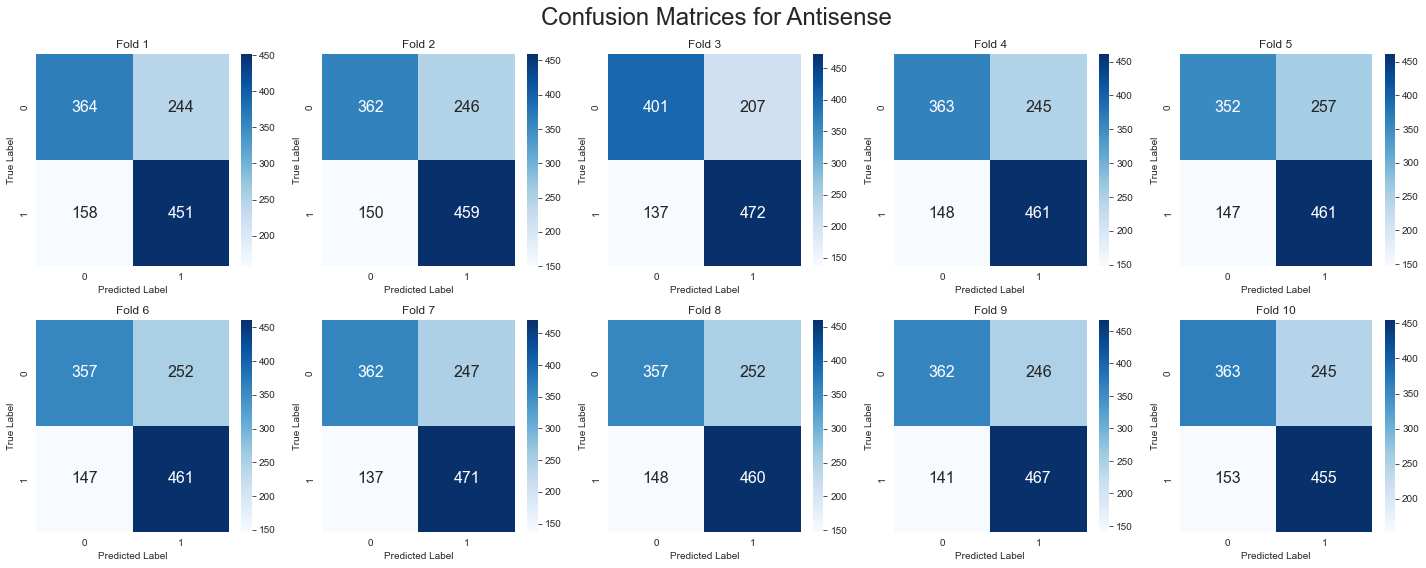

In [66]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [67]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez_RNA promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-14.2,-15.6,-13.8,-16.0,-13.8,-15.6,-11.1,-11.1,-14.2,...,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,-14.2,-14.4,1
1,-15.4,-14.2,-14.4,-13.7,-13.7,-15.4,-13.7,-13.7,-16.0,-13.8,...,-14.4,-14.0,-16.9,-14.0,-13.7,-16.0,-15.4,-14.4,-16.9,1
2,-11.1,-11.1,-16.9,-11.1,-14.4,-15.4,-14.4,-16.9,-14.4,-14.0,...,-14.0,-16.9,-14.4,-13.7,-15.4,-13.7,-14.4,-16.9,-14.0,1
3,-13.8,-14.4,-13.7,-13.8,-14.0,-14.4,-14.2,-15.4,-13.7,-16.0,...,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-13.7,-15.4,-14.2,1
4,-14.0,-14.2,-14.0,-13.7,-13.7,-16.0,-13.7,-13.7,-15.4,-14.2,...,-13.8,-14.4,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-11.1,-16.9,-11.1,-11.1,-14.4,-13.8,-15.6,-11.1,-16.9,-15.6,...,-14.4,-13.7,-13.8,-14.0,-14.2,-11.1,-11.1,-15.6,-11.1,0
12126,-11.1,-15.6,-14.2,-13.8,-15.6,-16.9,-14.4,-13.7,-14.0,-16.9,...,-11.1,-16.9,-15.6,-14.2,-13.7,-13.8,-11.1,-15.6,-16.9,0
12127,-13.7,-14.0,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-15.6,-14.2,...,-14.4,-13.8,-15.6,-16.9,-11.1,-14.4,-13.8,-11.1,-14.4,0
12128,-16.9,-11.1,-15.6,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-14.4,...,-16.9,-15.6,-11.1,-14.2,-15.4,-14.2,-15.6,-11.1,-16.9,0


In [68]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [69]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.6603462489694971, Precision: 0.6440177252584933, Recall: 0.7182866556836903, F1 Score: 0.6791277258566979, MCC: 0.32278491412406035, Specificity: 0.5970394736842105
Fold 2/10
 Accuracy: 0.6636438582028029, Precision: 0.6456808199121523, Recall: 0.7265238879736409, F1 Score: 0.6837209302325582, MCC: 0.329818010376314, Specificity: 0.6023102310231023
Fold 3/10
 Accuracy: 0.6875515251442704, Precision: 0.6743119266055045, Recall: 0.7265238879736409, F1 Score: 0.6994448850118954, MCC: 0.37619412577674666, Specificity: 0.6006600660066007
Fold 4/10
 Accuracy: 0.6578730420445177, Precision: 0.6379310344827587, Recall: 0.7314662273476112, F1 Score: 0.6815042210283959, MCC: 0.31911827135881116, Specificity: 0.6485148514851485
Fold 5/10
 Accuracy: 0.6455070074196207, Precision: 0.62882096069869, Recall: 0.7116968698517299, F1 Score: 0.6676970633693973, MCC: 0.29350147646559216, Specificity: 0.5841584158415841
Fold 6/10
 Accuracy: 0.6751854905193735, Precision: 0.6572700296

In [71]:
internal_accuracy

[0.6603462489694971,
 0.6636438582028029,
 0.6875515251442704,
 0.6578730420445177,
 0.6455070074196207,
 0.6751854905193735,
 0.6685902720527618,
 0.6710634789777411,
 0.6471558120362737,
 0.6331409727947238]

In [72]:
internal_precision

[0.6440177252584933,
 0.6456808199121523,
 0.6743119266055045,
 0.6379310344827587,
 0.62882096069869,
 0.6572700296735905,
 0.6550151975683891,
 0.6580152671755726,
 0.6320474777448071,
 0.6203288490284006]

In [73]:
internal_recall

[0.7182866556836903,
 0.7265238879736409,
 0.7265238879736409,
 0.7314662273476112,
 0.7116968698517299,
 0.731023102310231,
 0.7112211221122112,
 0.7112211221122112,
 0.7029702970297029,
 0.6848184818481848]

In [74]:
internal_specificity

[0.5970394736842105,
 0.6023102310231023,
 0.6006600660066007,
 0.6485148514851485,
 0.5841584158415841,
 0.5792079207920792,
 0.6194398682042833,
 0.6260296540362438,
 0.6309719934102141,
 0.5914332784184514]

In [75]:
internal_f1_score

[0.6791277258566979,
 0.6837209302325582,
 0.6994448850118954,
 0.6815042210283959,
 0.6676970633693973,
 0.6921875,
 0.6819620253164557,
 0.6835844567803332,
 0.665625,
 0.6509803921568627]

In [76]:
internal_mcc

[0.32278491412406035,
 0.329818010376314,
 0.37619412577674666,
 0.31911827135881116,
 0.29350147646559216,
 0.3526537159942973,
 0.3384731140687365,
 0.3432923898311974,
 0.2962438934172628,
 0.2677926797799743]

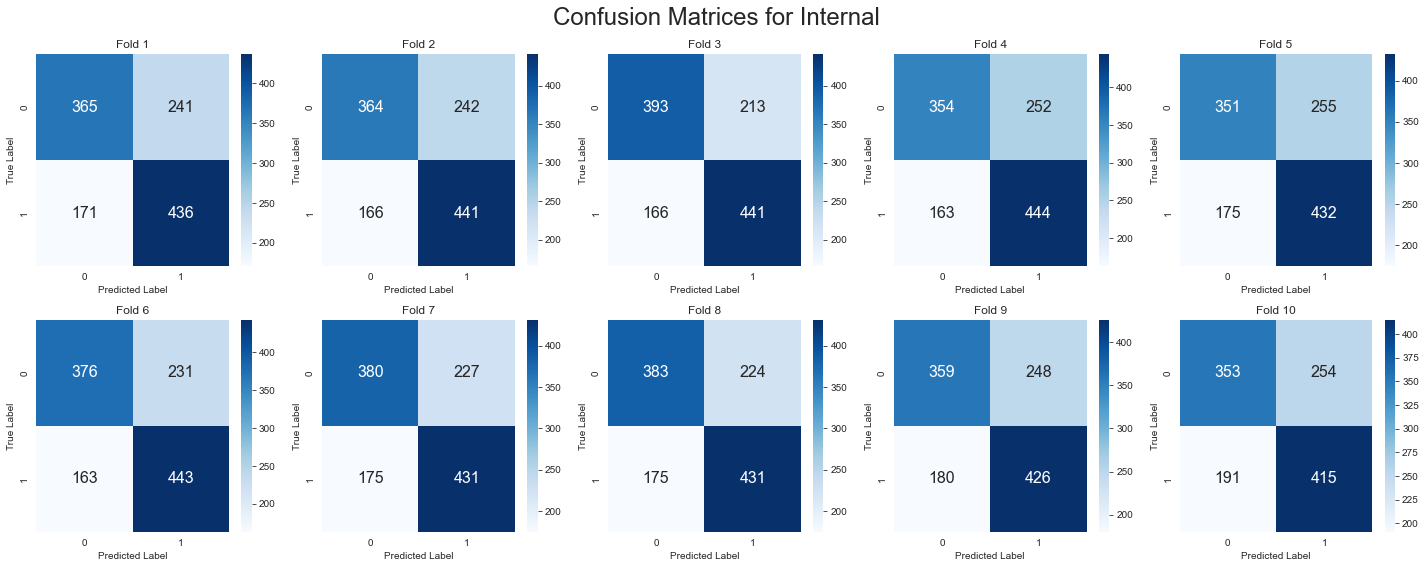

In [77]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
